Group Members: Kamran Qureshi & Lingyao Meng

##### Attestation
Both of us worked together on all questions. We will upload the exact same copy to our github accounts.

# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/LingyaoMeng/master/Project2/SFPD_Incident_2015.csv

--2016-11-11 08:23:08--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/LingyaoMeng/master/Project2/SFPD_Incident_2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23497300 (22M) [text/plain]
Saving to: ‘SFPD_Incident_2015.csv’

SFPD_Incident_2015. 100%[=====================>]  22.41M   105MB/s   in 0.2s   

2016-11-11 08:23:08 (105 MB/s) - ‘SFPD_Incident_2015.csv’ saved [23497300/23497300]



The data is downloaded from https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry.

We choose the year 2015 to do data exploration. Therefore the date is from 01/01/2015 to 12/31/2015. However, we noticed that if include all columns in the downloaded dat, the size would exceed the maximum allowed for github. We made a concious choice of trimming down two columns: PDID and location. PDID is the unique indentification to each case recorded, and location is the longitude and latitude of the location of the crime. Since we can easily generate the key for each crime, we don't think it's neccessary to include it in the downloaed data set. As for the column Location, we can combine column X and column Y to obtain therefore it is also redundant for us to download.


## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [2]:
!csvstat SFPD_Incident_2015.csv

  1. ﻿IncidntNum
	<class 'str'>
	Nulls: False
	Unique values: 122104
	5 most frequent values:
		151121761:	14
		150109908:	13
		151038144:	13
		150327649:	11
		150491852:	11
	Max length: 9
  2. Category
	<class 'str'>
	Nulls: False
	Unique values: 39
	5 most frequent values:
		LARCENY/THEFT:	42056
		OTHER OFFENSES:	20363
		NON-CRIMINAL:	19161
		ASSAULT:	13100
		VEHICLE THEFT:	7948
	Max length: 27
  3. Descript
	<class 'str'>
	Nulls: False
	Unique values: 733
	5 most frequent values:
		GRAND THEFT FROM LOCKED AUTO:	17729
		STOLEN AUTOMOBILE:	4990
		DRIVERS LICENSE, SUSPENDED OR REVOKED:	4808
		AIDED CASE, MENTAL DISTURBED:	4684
		LOST PROPERTY:	4553
	Max length: 62
  4. DayOfWeek
	<class 'str'>
	Nulls: False
	Unique values: 7
	5 most frequent values:
		Friday:	23814
		Saturday:	22884
		Thursday:	22446
		Wednesday:	22422
		Tuesday:	21805
	Max length: 9
  5. Date
	<class 'datetime.date'>
	Nulls: False
	Min: 2015-01-01
	Max: 2015-12-31
	Unique values: 365
	5 most frequent values:
		2015-06

There are 11 columns in the data set. 

1 IncidntNum

Incident number that associated with each case. there are duplicate, which indicated there are some cases with same incident that happened. 

2 Category

The category of the crime. The most commonly seen ones are LARCENY/THEFT, and OTHER OFFENSES

3 Descript 

Description of the case. The most commonly seen one in San Fran is GRAND THEFT FROM LOCKED AUTO

4 DayOfWeek

The day of week that the crime happened. 

5 Date 

Self explanatory. The date that the event occured. 

6 Time 

Self explanatory. The time that the event occured. 

7 PdDistrict

The police district that the crime happened. The highest frequency occured in SOUTHERN

8 Resolution 

The resolution of the case. the most common one is ARREST, BOOKED. 

9 Address 

the address of the crime scene. 

10 X 

The latitude of the crime scene. 

11 Y 

The longitude of the crime scene. 

The only column that has null value in our data set is Resolution, as it has Nulls: True when examining the data by csvstat, which is quite understandable since some resolution may not be present when the record was made.

Interesting question of crime can be: during what time of the day San Fran would have most crime occur? Does the frequency of crime follow any trend as months goes by? There are more topics we want to discuss and we will dive in those in Part 4.


## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [3]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [4]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [5]:
!createdb -U dbuser project2

In [6]:
%sql postgresql://dbuser@localhost:5432/project2

'Connected: dbuser@project2'

In [7]:
%%sql
DROP TABLE IF EXISTS sfcrime;
CREATE TABLE sfcrime 
(
    INCIDENT_NUM INTEGER,
    CATEGORY VARCHAR(27),
    DESCRIPTION VARCHAR(62),
    DAY_OF_WEEK VARCHAR(9),
    DATE DATE,
    TIME TIME,
    PDDISTRICT VARCHAR(20),
    RESOLUTION VARCHAR(38),
    ADDRESS VARCHAR(42),
    LATITUDE float, 
    LONGITUDE float   
)

Done.
Done.


[]

In [8]:
!pwd

/home/jovyan/work


In [9]:
%%sql
COPY sfcrime FROM '/home/jovyan/work/SFPD_Incident_2015.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

156424 rows affected.


[]

In [10]:
%%sql
SELECT COUNT(*) FROM sfcrime

1 rows affected.


count
156424


We have a very neat data set that can be divided into the following dimensions:

a. Crime Type Dimension. This dimension includes the Category of the crime

b. Time Dimension. The time dimension includes the DayOfWeek, and Date of the crime. 

c. Location Dimension. The location dimension describes the location of the crime. It consists of the police district of the crime. 

Since we are looking at crime data and we want to explore more about the time of the occurence of the crime. We decide to include Time in our fact table along with the surrogate key from all dimensions. We are keeping some more columns in the fact table in order to avoid loss of important information like address, resolution and co-ordinates


## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

### Schema Design

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/kamran1310/istm-6212/master/schema.jpg")

In [12]:
%%sql
SELECT *
FROM sfcrime 
limit 5;

5 rows affected.


incident_num,category,description,day_of_week,date,time,pddistrict,resolution,address,latitude,longitude
110914565,WARRANTS,WARRANT ARREST,Friday,2015-05-29,16:42:00,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406970988225,37.7725273607571
150906209,NON-CRIMINAL,"LICENSE PLATE, RECOVERED",Tuesday,2015-10-13,18:00:00,NORTHERN,NONE,OFARRELL ST / FILLMORE ST,-122.432706975892,37.7832909416362
150021318,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2015-01-07,18:20:00,SOUTHERN,NONE,0 Block of FOLSOM ST,-122.39055604599,37.7904750361645
150021324,NON-CRIMINAL,"LICENSE PLATE, RECOVERED",Wednesday,2015-01-07,20:35:00,NORTHERN,NONE,300 Block of LARKIN ST,-122.4169801816,37.7809770123705
150021346,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Wednesday,2015-01-07,17:30:00,INGLESIDE,NONE,200 Block of TEDDY AV,-122.407583029168,37.7148189169113


### Dimension 1

We create a table with an identifier, day_no, for each day in the year 2015. Each day has a date associated with it along with a day name. Primary key day_no becomes the foreign key for the fact table

In [13]:
%%sql
drop table if exists dates cascade;
create table dates
(
    day_no serial,
    date date,
    day VARCHAR(10),
    PRIMARY KEY(day_no)
)

Done.
Done.


[]

In [14]:
%%sql
insert into dates(date) select *
FROM generate_series( '2015-01-01'::timestamp
        , '2015-12-31'::timestamp
        , '1 day'::interval);



365 rows affected.


[]

In [15]:
%%sql
update dates
set day=to_char(date, 'Day');

365 rows affected.


[]

Adding day_no in a temporary fact table fact_table1.

In [16]:
%%sql
drop table if exists fact_table1;
create table fact_table1 as
select b.day_no,a.* from sfcrime as a left join dates as b on a.date=b.date;

Done.
156424 rows affected.


[]

Setting day_no as foreign key in the temporary fact table 

In [17]:
%%sql
Alter table fact_table1
Add CONSTRAINT day_no
Foreign Key (day_no) 
References dates (day_no) MATCH FULL;

Done.


[]

### Dimension 2

Our second dimension is crime_type. In our parent table, there is only one categorical column describing the category of crime. Therefore, we use that column to form our second dimension table. More information or columns can be added to this dimension with time

In [18]:
%%sql
drop sequence if exists seq cascade;
CREATE SEQUENCE seq;
SELECT setval('seq', 1000);


Done.
Done.
1 rows affected.


setval
1000


In [19]:
%%sql
drop table if exists crime_type cascade;
create table crime_type
(
    crime_id text PRIMARY KEY CHECK (crime_id ~ '^CR[0-9]+$' ) DEFAULT 'CR'  || nextval('seq'),
    category varchar(50)
)


Done.
Done.


[]

In [20]:
%%sql
insert into crime_type(category)
select distinct(category) FROM fact_table1;

39 rows affected.


[]

Adding primary key of our dimension table to our second temporary fact table

In [21]:
%%sql
drop table if exists fact_table2 cascade;
create table fact_table2 as
select b.crime_id,a.* from fact_table1 as a left join crime_type as b on a.category=b.category;

Done.
156424 rows affected.


[]

Adding crime_id as foreign key in our temporary fact table

In [22]:
%%sql
Alter table fact_table2
Add CONSTRAINT crime_id
Foreign Key (crime_id) 
References crime_type(crime_id) MATCH FULL;

Done.


[]

### Dimension 3

Our third dimension is district/location. There is just one column which gives information about the police district where the crime took place. There is no zip code or any other information available about the district besides co-ordinates and address. Address had too many unique values, so we decided to keep it in the fact table. 

In [23]:
%%sql
drop table if exists district cascade;
create table district
(
    district_no serial,
    pd_district varchar(50),
    PRIMARY KEY(district_no)
)

Done.
Done.


[]

In [24]:
%%sql
insert into district(pd_district) select distinct(pddistrict) from fact_table2;

10 rows affected.


[]

### Final Fact Table

As we know that fact tables should not have too many columns, just measurable quantities and foreign keys, but our data was such that we couldn't think of any way to make the fact table narrower. We avoided deleting columns as that would result in loss of information.
We did not drop latitude and longitude as we have thought of using it for the bonus question.

In [25]:
%%sql
drop table if exists sf_crime cascade;
create table sf_crime
(
    instance_no serial,
    crime_id text,
    INCIDENT_NUM INTEGER,
    DESCRIPTION VARCHAR(62),
    day_no integer,
    TIME TIME,
    district_no integer,
    RESOLUTION VARCHAR(38),
    ADDRESS VARCHAR(42),
    LATITUDE float, 
    LONGITUDE float,
    PRIMARY KEY(instance_no)
)

Done.
Done.


[]

In [26]:
%%sql
insert into sf_crime(crime_id,incident_num,description,day_no,time,district_no,resolution,address,latitude,longitude)
select a.crime_id,a.incident_num,a.description,a.day_no,a.time,b.district_no,a.resolution,a.address,a.latitude,a.longitude
from fact_table2 as a
left join
district as b
on a.pddistrict=b.pd_district;

156424 rows affected.


[]

Adding foreign key constraints from our dimension tables

In [27]:
%%sql
Alter table sf_crime
Add CONSTRAINT day_no
Foreign Key (day_no) 
References dates (day_no) MATCH FULL;

Done.


[]

In [28]:
%%sql
Alter table sf_crime
Add CONSTRAINT crime_id
Foreign Key (crime_id) 
References crime_type(crime_id) MATCH FULL;

Done.


[]

In [29]:
%%sql
Alter table sf_crime
Add CONSTRAINT district_no
Foreign Key (district_no) 
References district(district_no) MATCH FULL;

Done.


[]

We did not delete the temporary fact tables as we might use them for the bonus question.

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

#### Which district saw the most number of crimes ?

In [30]:
%%sql
select b.pd_district as district_name, count(a.instance_no) as no_of_crimes
from sf_crime as a
left join district as b
on a.district_no = b.district_no
group by b.pd_district;

10 rows affected.


district_name,no_of_crimes
BAYVIEW,14699
INGLESIDE,13403
MISSION,18536
CENTRAL,18560
TARAVAL,11937
SOUTHERN,30065
TENDERLOIN,10729
PARK,9335
NORTHERN,20079
RICHMOND,9081


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


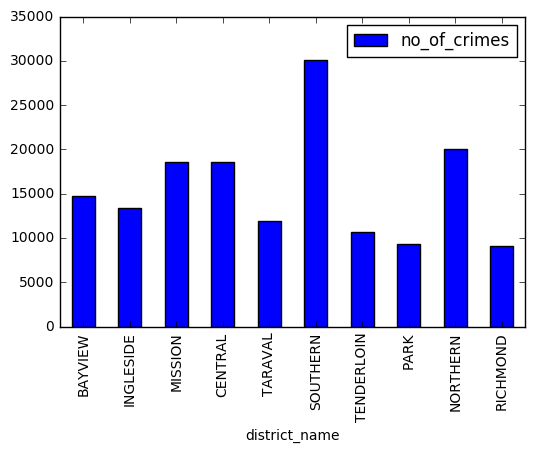

In [31]:
import matplotlib as plt
df = _.DataFrame()
df.plot(x='district_name', y='no_of_crimes', kind = 'bar')



Southern district witnessed comparatively more number of crimes compared to others

#### Which part of the day witnessed more crimes ?

In [32]:
%%sql
select time_of_day,count(instance_no) as no_of_crimes
from
(select instance_no,
case
    when time between '00:00:00' and '06:00:00' then 'Early Morning'
    when time between '06:00:01' and '12:00:00' then 'Morning'
    when time between '12:00:01' and '18:00:00' then 'Afternoon'
    when time between '18:00:01' and '20:00:00' then 'Evening'
    else 'Night' end as time_of_day
from sf_crime) as a
group by time_of_day;
    


5 rows affected.


time_of_day,no_of_crimes
Night,28706
Evening,19828
Morning,34613
Early Morning,23054
Afternoon,50223


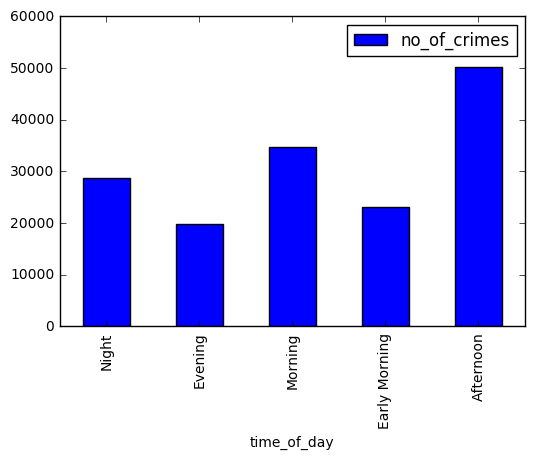

In [33]:
df = _.DataFrame()
df.plot(x='time_of_day', y='no_of_crimes', kind = 'bar')

Even though afternoon shows more number of crimes, it would not be fair to conclude that as evening has a shorter duration and when we combine crimes that happened in evening and night, we get a similar number as afternoon


#### Which month had the most number of crimes?

In [34]:
%%sql
select extract(month from b.date) as month, count(a.instance_no)
from sf_crime as a
left join dates as b
on a.day_no=b.day_no
group by month
order by month;

12 rows affected.


month,count
1.0,13602
2.0,12324
3.0,13929
4.0,12961
5.0,13727
6.0,13302
7.0,13361
8.0,13719
9.0,12888
10.0,13136


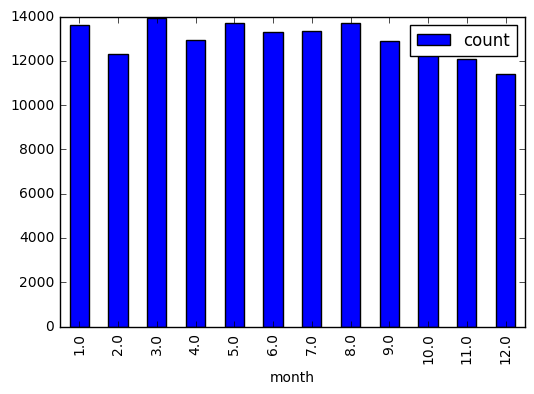

In [35]:
df = _.DataFrame()
df.plot(x='month', y='count', kind = 'bar')

Criminals do not prefer a particular month for their activities!

#### Which district had more theft related crimes on Saturdays?

In [36]:
%%sql
select pd_district,count(instance_no)
from
(select 
a.instance_no,
b.pd_district,
c.day,
d.category
from 
sf_crime as a
left join district as b on a.district_no=b.district_no
left join dates as c on a.day_no=c.day_no
left join crime_type as d on a.crime_id=d.crime_id) as j
where day like '%Saturday%' and category like '%THEFT%'
group by pd_district;


10 rows affected.


pd_district,count
BAYVIEW,395
PARK,456
INGLESIDE,451
CENTRAL,1220
NORTHERN,1345
SOUTHERN,1933
TARAVAL,470
MISSION,530
RICHMOND,463
TENDERLOIN,372


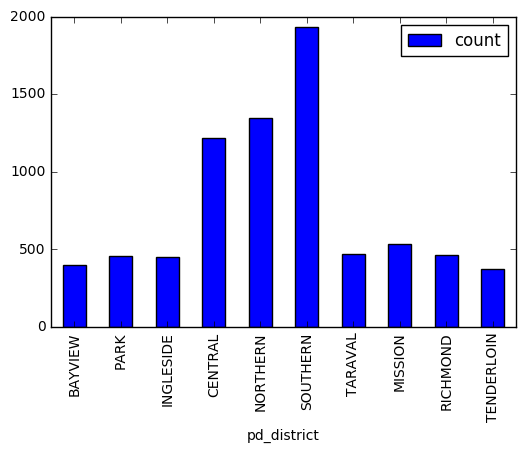

In [37]:
df = _.DataFrame()
df.plot(x='pd_district', y='count', kind = 'bar')

Southern district has the most number of criminal incidents and criminals enjoy robbing on Saturdays in the Southern district. One reason could be that people go out on Saturdays


#### For Southern district, which month saw the maximum number of Assault incidents?

In [38]:
%%sql

select 
extract(month from c.date)as month,
count(a.instance_no) as count
from 
sf_crime as a
left join district as b on a.district_no=b.district_no
left join dates as c on a.day_no=c.day_no
left join crime_type as d on a.crime_id=d.crime_id
where d.category like '%ASSAULT%' and b.pd_district='SOUTHERN'
group by b.pd_district,month
order by month;




12 rows affected.


month,count
1.0,183
2.0,147
3.0,184
4.0,173
5.0,162
6.0,180
7.0,156
8.0,191
9.0,210
10.0,195


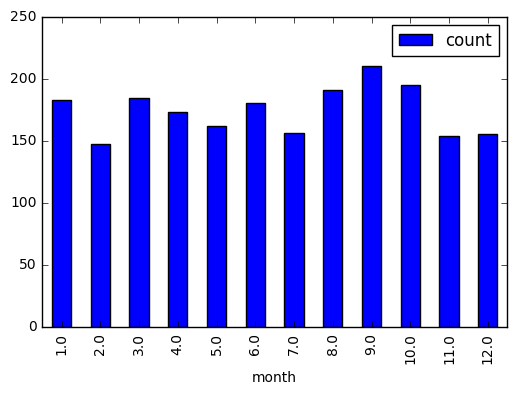

In [39]:
df = _.DataFrame()
df.plot(x='month', y='count', kind = 'bar')

Nothing interesting here !!

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

### Option B

For our district table, which has only one column, we thought of adding some more information to it. There are police stations in each district, the co-ordinates of each of these stations are available on http://www.lat-long.com. We had to manually search for the co-ordinates of each police station in San Francisco post which we added them to a csv file. 
We intend to use the latitude & longitude information of police stations to see whether the number of crimes increased with increase in distance from the police station in a district.

In [40]:

!wget https://raw.githubusercontent.com/kamran1310/istm-6212/master/stations.csv

--2016-11-11 08:24:14--  https://raw.githubusercontent.com/kamran1310/istm-6212/master/stations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335 [text/plain]
Saving to: ‘stations.csv’

stations.csv        100%[=====================>]     335  --.-KB/s   in 0s     

2016-11-11 08:24:14 (12.0 MB/s) - ‘stations.csv’ saved [335/335]



In [41]:
%%sql
drop table if exists stations;
create table stations
(
    district varchar(50),
    long float,
    lat float
);

Done.
Done.


[]

In [42]:
%%sql
COPY stations FROM '/home/jovyan/work/stations.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

10 rows affected.


[]

In [43]:
%%sql
create table bonus as
select a.*,b.lat,b.long from 
sf_crime as a left join 
district as c on a.district_no=c.district_no
left join stations as b
on b.district=c.pd_district;

156424 rows affected.


[]

In [44]:
%%sql
select point(latitude,longitude)<->point(lat,long) as dist from bonus
limit 100;

100 rows affected.


dist
226.527980936321
226.578145885587
226.52906562417
226.565389498535
226.481715967049
226.551441209361
226.576562685606
226.564386914479
226.50309605615
226.576873822389
